In [13]:
import torch
from torchvision import datasets, transforms

# transform = transforms.ToTensor()

# train = datasets.MNIST(root='./data', train=True, download=True, transform=None)
# test = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# print(len(train))
# print(len(test))

# New

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


In [16]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


11490434/11490434 [==============================] - 0s 0us/step


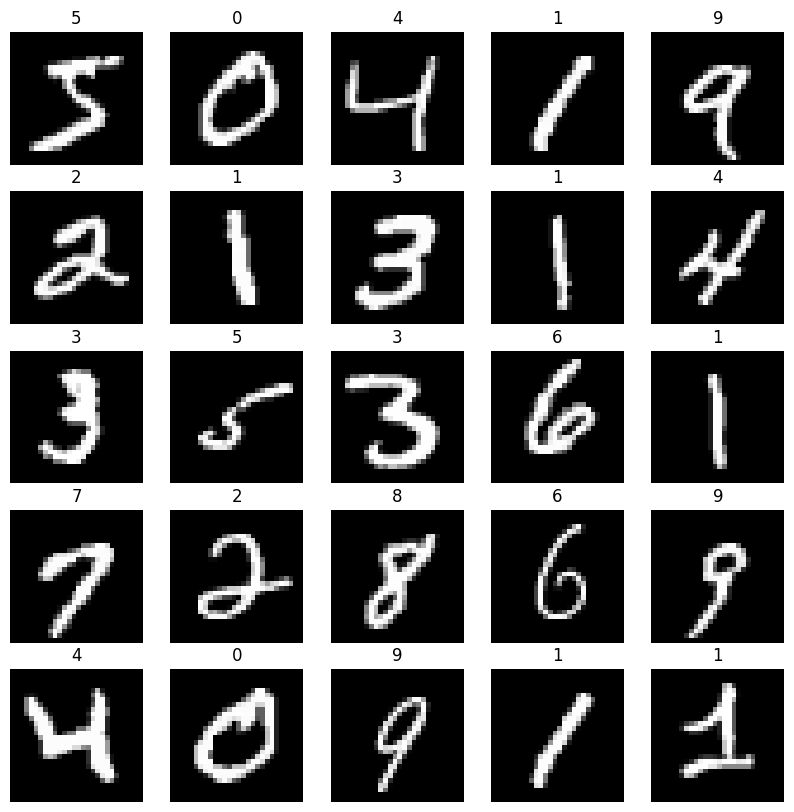

In [23]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')
plt.show()


In [19]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 256)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

lenet = LeNet()


In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(lenet.parameters(), lr=0.001, momentum=0.9)


In [21]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = lenet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}: Loss {running_loss / 100}')
            running_loss = 0.0


Epoch 1, Mini-batch 100: Loss 2.2926685094833372
Epoch 1, Mini-batch 200: Loss 2.2422710394859315
Epoch 1, Mini-batch 300: Loss 2.013153464794159
Epoch 1, Mini-batch 400: Loss 1.0985556268692016
Epoch 1, Mini-batch 500: Loss 0.5791096958518028
Epoch 1, Mini-batch 600: Loss 0.4272470396757126
Epoch 1, Mini-batch 700: Loss 0.3653133098036051
Epoch 1, Mini-batch 800: Loss 0.3137962347269058
Epoch 1, Mini-batch 900: Loss 0.29352568186819555
Epoch 2, Mini-batch 100: Loss 0.24125996276736258
Epoch 2, Mini-batch 200: Loss 0.238457782715559
Epoch 2, Mini-batch 300: Loss 0.2161848749220371
Epoch 2, Mini-batch 400: Loss 0.20309244103729726
Epoch 2, Mini-batch 500: Loss 0.19293741442263126
Epoch 2, Mini-batch 600: Loss 0.19235299438238143
Epoch 2, Mini-batch 700: Loss 0.1607450407743454
Epoch 2, Mini-batch 800: Loss 0.14703908028081059
Epoch 2, Mini-batch 900: Loss 0.1468288841471076
Epoch 3, Mini-batch 100: Loss 0.14529032330960034
Epoch 3, Mini-batch 200: Loss 0.14136480107903482
Epoch 3, Mini-

In [22]:
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = lenet(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the {total} test images: {100 * correct / total}%')

Accuracy of the network on the 10000 test images: 98.01%


# Old

In [4]:
import torch.nn.functional as F, torch.optim, torch.nn as nn

In [10]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

lenet = LeNet5()
lenet

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)